In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
# Load the original dataset
df_original = pd.read_csv('HouseListings-Top45Cities-10292023-kaggle.csv', encoding = "Windows-1252") 

print("="*60)
print("ORIGINAL DATASET INFORMATION")
print("="*60)
print(f"\nDataset shape: {df_original.shape}")
print(f"Total rows: {df_original.shape[0]}")
print(f"Total columns: {df_original.shape[1]}")

print("\nColumn names:")
print(df_original.columns.tolist())

print("\nFirst 5 rows:")
print(df_original.head())

print("\nData types:")
print(df_original.dtypes)

print("\nUnique cities:")
print(df_original['City'].unique())
print(f"Number of cities: {df_original['City'].nunique()}")

ORIGINAL DATASET INFORMATION

Dataset shape: (35768, 10)
Total rows: 35768
Total columns: 10

Column names:
['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province', 'Population', 'Latitude', 'Longitude', 'Median_Family_Income']

First 5 rows:
      City      Price                  Address  Number_Beds  Number_Baths  \
0  Toronto   779900.0    #318 -20 SOUTHPORT ST            3             2   
1  Toronto   799999.0    #818 -60 SOUTHPORT ST            3             1   
2  Toronto   799900.0  #714 -859 THE QUEENSWAY            2             2   
3  Toronto  1200000.0         275 MORTIMER AVE            4             2   
4  Toronto   668800.0    #420 -388 RICHMOND ST            1             1   

  Province  Population  Latitude  Longitude  Median_Family_Income  
0  Ontario     5647656   43.7417   -79.3733               97000.0  
1  Ontario     5647656   43.7417   -79.3733               97000.0  
2  Ontario     5647656   43.7417   -79.3733               97000.0  
3  Onta

In [7]:
# DATA PRE-PROCESSING

print("="*60)
print("DATA PREPROCESSING")
print("="*60)

# Step 1: Filter to Toronto only
print("\nStep 1: Filtering to Toronto only...")
df_toronto = df_original[df_original['City'] == 'Toronto'].copy()
print(f"Rows after filtering: {len(df_toronto)} (removed {len(df_original) - len(df_toronto)} rows)")

# Step 2: Select relevant columns
print("\nStep 2: Selecting relevant columns...")
columns_to_keep = ['City', 'Price', 'Number_Beds', 'Number_Baths', 'Median_Family_Income']

# Check if columns exist (in case names are slightly different)
available_cols = [col for col in columns_to_keep if col in df_toronto.columns]
print(f"Available columns: {available_cols}")

df_clean = df_toronto[available_cols].copy()
print(f"Columns after selection: {df_clean.shape[1]}")

# Step 3: Check for missing values
print("\nStep 3: Checking for missing values...")
missing = df_clean.isnull().sum()
print(missing)

if missing.sum() > 0:
    print(f"\nRemoving {missing.sum()} rows with missing values...")
    df_clean = df_clean.dropna()

# Step 4: Check for duplicates
print("\nStep 4: Checking for duplicates...")
duplicates = df_clean.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df_clean = df_clean.drop_duplicates()

# Step 5: Check for outliers/invalid values
print("\nStep 5: Checking for invalid values...")
print(f"Price range: ${df_clean['Price'].min():,.2f} to ${df_clean['Price'].max():,.2f}")
print(f"Bedrooms range: {df_clean['Number_Beds'].min()} to {df_clean['Number_Beds'].max()}")
print(f"Bathrooms range: {df_clean['Number_Baths'].min()} to {df_clean['Number_Baths'].max()}")

# Remove unrealistic values if any (e.g., price = 0, negative values)
print("\nRemoving invalid values (if any)...")
original_len = len(df_clean)
df_clean = df_clean[
    (df_clean['Price'] > 0) & 
    (df_clean['Number_Beds'] > 0) & 
    (df_clean['Number_Baths'] > 0)
]
print(f"Removed {original_len - len(df_clean)} invalid rows")

# Final cleaned dataset
print("\n" + "="*60)
print("FINAL CLEANED DATASET")
print("="*60)
print(f"Final shape: {df_clean.shape}")
print(f"Total rows: {len(df_clean)}")
print(f"Total columns: {df_clean.shape[1]}")

print("\nFinal dataset preview:")
print(df_clean.head(10))

# Save cleaned data
df_clean.to_csv('toronto_housing_cleaned.csv', index=False)
print("\n✓ Cleaned data saved to 'toronto_housing_cleaned.csv'")

DATA PREPROCESSING

Step 1: Filtering to Toronto only...
Rows after filtering: 1276 (removed 34492 rows)

Step 2: Selecting relevant columns...
Available columns: ['City', 'Price', 'Number_Beds', 'Number_Baths', 'Median_Family_Income']
Columns after selection: 5

Step 3: Checking for missing values...
City                    0
Price                   0
Number_Beds             0
Number_Baths            0
Median_Family_Income    0
dtype: int64

Step 4: Checking for duplicates...
Duplicate rows: 293
Removing 293 duplicate rows...

Step 5: Checking for invalid values...
Price range: $45,000.00 to $12,750,000.00
Bedrooms range: 0 to 15
Bathrooms range: 0 to 8

Removing invalid values (if any)...
Removed 20 invalid rows

FINAL CLEANED DATASET
Final shape: (963, 5)
Total rows: 963
Total columns: 5

Final dataset preview:
       City      Price  Number_Beds  Number_Baths  Median_Family_Income
0   Toronto   779900.0            3             2               97000.0
1   Toronto   799999.0        

In [8]:
# EXPLORATORY DATA ANALYSIS
print("="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

print("\nBasic Statistics:")
print(df_clean.describe())

print("\nDistribution of Bedrooms:")
print(df_clean['Number_Beds'].value_counts().sort_index())

print("\nDistribution of Bathrooms:")
print(df_clean['Number_Baths'].value_counts().sort_index())

EXPLORATORY DATA ANALYSIS

Basic Statistics:
              Price  Number_Beds  Number_Baths  Median_Family_Income
count  9.630000e+02   963.000000    963.000000                 963.0
mean   1.371510e+06     2.924195      2.294912               97000.0
std    1.201721e+06     1.520978      1.303380                   0.0
min    4.500000e+04     1.000000      1.000000               97000.0
25%    6.999000e+05     2.000000      1.000000               97000.0
50%    9.890000e+05     3.000000      2.000000               97000.0
75%    1.588000e+06     4.000000      3.000000               97000.0
max    1.275000e+07    15.000000      8.000000               97000.0

Distribution of Bedrooms:
Number_Beds
1     122
2     337
3     213
4     163
5      85
6      27
7       7
8       3
9       2
10      1
11      1
15      2
Name: count, dtype: int64

Distribution of Bathrooms:
Number_Baths
1    291
2    368
3    142
4     87
5     51
6     16
7      6
8      2
Name: count, dtype: int64


In [ ]:
# STATISTICAL ANALYSIS

print("="*60)
print("STATISTICAL ANALYSIS - OVERALL PRICES")
print("="*60)

prices = df_clean['Price']

# Calculate statistics
stats_dict = {
    'Sample Size': len(prices),
    'Mean': prices.mean(),
    'Median': prices.median(),
    'Mode': prices.mode()[0] if len(prices.mode()) > 0 else 'N/A',
    'Standard Deviation': prices.std(),
    'Variance': prices.var(),
    'Minimum': prices.min(),
    'Maximum': prices.max(),
    'Range': prices.max() - prices.min(),
    'Q1 (25th percentile)': prices.quantile(0.25),
    'Q3 (75th percentile)': prices.quantile(0.75),
    'IQR': prices.quantile(0.75) - prices.quantile(0.25)
}

for key, value in stats_dict.items():
    if isinstance(value, (int, float)) and value > 1000:
        print(f"{key:.<30} ${value:,.2f}")
    elif isinstance(value, (int, float)):
        print(f"{key:.<30} {value:.2f}")
    else:
        print(f"{key:.<30} {value}")

# Create summary table
summary_df = pd.DataFrame({
    'Statistic': list(stats_dict.keys()),
    'Value': [f"${v:,.2f}" if isinstance(v, (int, float)) and v > 100 else 
              f"{v:.2f}" if isinstance(v, (int, float)) else str(v) 
              for v in stats_dict.values()]
})

print("\nSummary Table:")
print(summary_df.to_string(index=False))
summary_df.to_csv('summary_statistics.csv', index=False)

STATISTICAL ANALYSIS - OVERALL PRICES
Sample Size................... 963.00
Mean.......................... $1,371,510.46
Median........................ $989,000.00
Mode.......................... $899,000.00
Standard Deviation............ $1,201,720.91
Variance...................... $1,444,133,143,874.85
Minimum....................... $45,000.00
Maximum....................... $12,750,000.00
Range......................... $12,705,000.00
Q1 (25th percentile).......... $699,900.00
Q3 (75th percentile).......... $1,588,000.00
IQR........................... $888,100.00

Summary Table:
           Statistic                 Value
         Sample Size               $963.00
                Mean         $1,371,510.46
              Median           $989,000.00
                Mode           $899,000.00
  Standard Deviation         $1,201,720.91
            Variance $1,444,133,143,874.85
             Minimum            $45,000.00
             Maximum        $12,750,000.00
               Range       

In [10]:
# Analysis by Number of bedrooms

print("="*60)
print("PRICE ANALYSIS BY NUMBER OF BEDROOMS")
print("="*60)

bedroom_stats = df_clean.groupby('Number_Beds')['Price'].agg([
    ('Count', 'count'),
    ('Mean', lambda x: f"${x.mean():,.2f}"),
    ('Median', lambda x: f"${x.median():,.2f}"),
    ('Std_Dev', lambda x: f"${x.std():,.2f}"),
    ('Min', lambda x: f"${x.min():,.2f}"),
    ('Max', lambda x: f"${x.max():,.2f}")
])

print(bedroom_stats)
bedroom_stats.to_csv('bedroom_statistics.csv')

# Calculate mean price increase per bedroom
print("\n" + "="*60)
print("PRICE INCREASE PER BEDROOM")
print("="*60)
bedroom_means = df_clean.groupby('Number_Beds')['Price'].mean()
for i in range(len(bedroom_means) - 1):
    beds_current = bedroom_means.index[i]
    beds_next = bedroom_means.index[i + 1]
    price_current = bedroom_means.iloc[i]
    price_next = bedroom_means.iloc[i + 1]
    increase = price_next - price_current
    percent_increase = (increase / price_current) * 100
    print(f"{beds_current} to {beds_next} bedrooms: ${increase:,.2f} increase ({percent_increase:.1f}%)")

PRICE ANALYSIS BY NUMBER OF BEDROOMS
             Count           Mean         Median        Std_Dev  \
Number_Beds                                                       
1              122    $643,188.50    $618,500.00    $205,917.35   
2              337    $871,116.12    $765,000.00    $412,332.32   
3              213  $1,278,671.38  $1,139,900.00    $622,400.98   
4              163  $1,893,600.02  $1,599,900.00  $1,323,430.83   
5               85  $2,978,510.24  $2,399,000.00  $2,085,860.84   
6               27  $2,641,465.74  $2,379,000.00  $1,529,688.58   
7                7  $2,596,126.86  $2,125,000.00  $2,300,916.29   
8                3  $2,199,300.00  $1,999,000.00  $1,212,918.08   
9                2  $2,524,000.00  $2,524,000.00  $1,518,865.37   
10               1  $2,380,000.00  $2,380,000.00           $nan   
11               1  $2,199,000.00  $2,199,000.00           $nan   
15               2  $4,412,450.00  $4,412,450.00  $1,997,647.37   

                       M

In [11]:
# Correlation Analysis

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlations
correlation_matrix = df_clean[['Price', 'Number_Beds', 'Number_Baths', 'Median_Family_Income']].corr()

print("\nFull Correlation Matrix:")
print(correlation_matrix.round(3))

print("\nCorrelation with Price:")
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
for var, corr in price_correlations.items():
    if var != 'Price':
        strength = 'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.4 else 'Weak'
        direction = 'positive' if corr > 0 else 'negative'
        print(f"{var:.<30} {corr:.3f} ({strength} {direction})")

CORRELATION ANALYSIS

Full Correlation Matrix:
                      Price  Number_Beds  Number_Baths  Median_Family_Income
Price                 1.000        0.543         0.734                   NaN
Number_Beds           0.543        1.000         0.730                   NaN
Number_Baths          0.734        0.730         1.000                   NaN
Median_Family_Income    NaN          NaN           NaN                   NaN

Correlation with Price:
Number_Baths.................. 0.734 (Strong positive)
Number_Beds................... 0.543 (Moderate positive)
Median_Family_Income.......... nan (Weak negative)


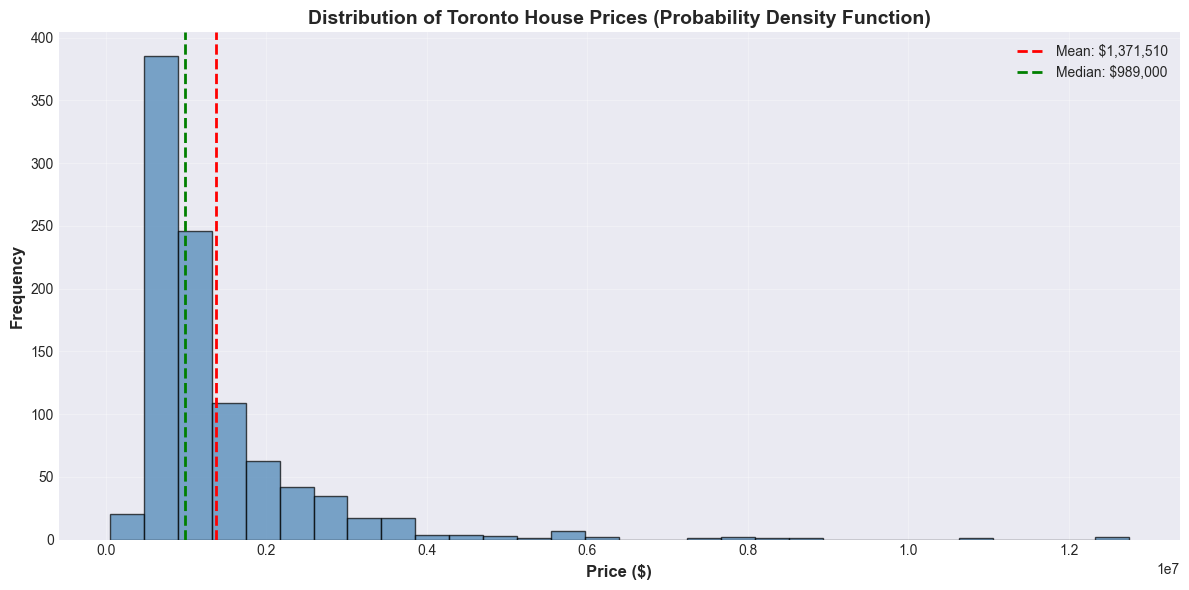

✓ Histogram saved as '1_price_histogram_pdf.png'


In [12]:
# Visualization 1: Histogram (PDF)

plt.figure(figsize=(12, 6))
plt.hist(df_clean['Price'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Toronto House Prices (Probability Density Function)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add mean and median lines
mean_price = df_clean['Price'].mean()
median_price = df_clean['Price'].median()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
plt.legend()

plt.tight_layout()
plt.savefig('1_price_histogram_pdf.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Histogram saved as '1_price_histogram_pdf.png'")